__<center>Airlines Reviews</center>__<br>

__Importing Libraries__

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

__Loading Dataset__

In [14]:
airlines_data = pd.read_csv(r'C:\Users\pauli\Desktop\Projekt Python\Airline Reviews Dataset/airlines_reviews.csv')

__Displaying the first few rows of the DataFrame__

In [17]:
airlines_data.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


__Checking for missing values__

In [20]:
airlines_data.isnull().sum()

Title                     0
Name                      0
Review Date               0
Airline                   0
Verified                  0
Reviews                   0
Type of Traveller         0
Month Flown               0
Route                     0
Class                     0
Seat Comfort              0
Staff Service             0
Food & Beverages          0
Inflight Entertainment    0
Value For Money           0
Overall Rating            0
Recommended               0
dtype: int64

__Summary Statistics__

In [23]:
airlines_data.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


__Distribution of Overall Rating__

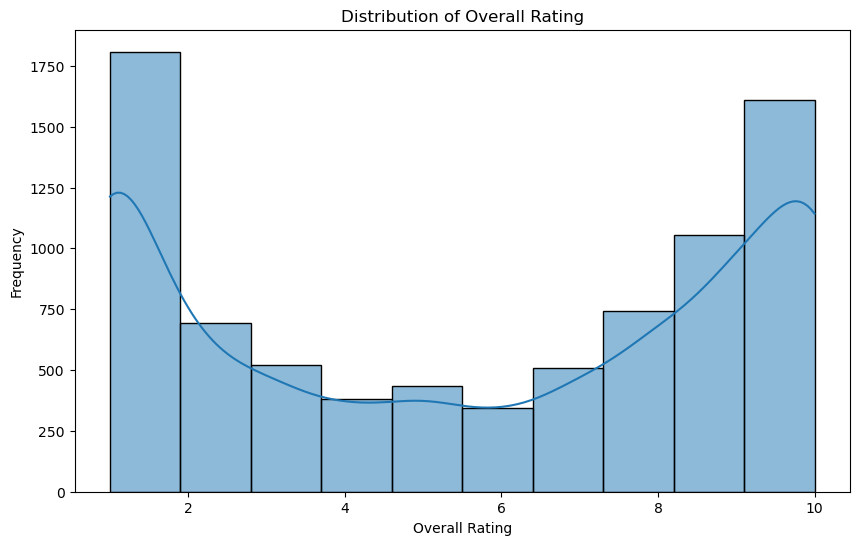

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(airlines_data['Overall Rating'], bins=10, kde=True)
plt.title('Distribution of Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

__Correlation Matrix__

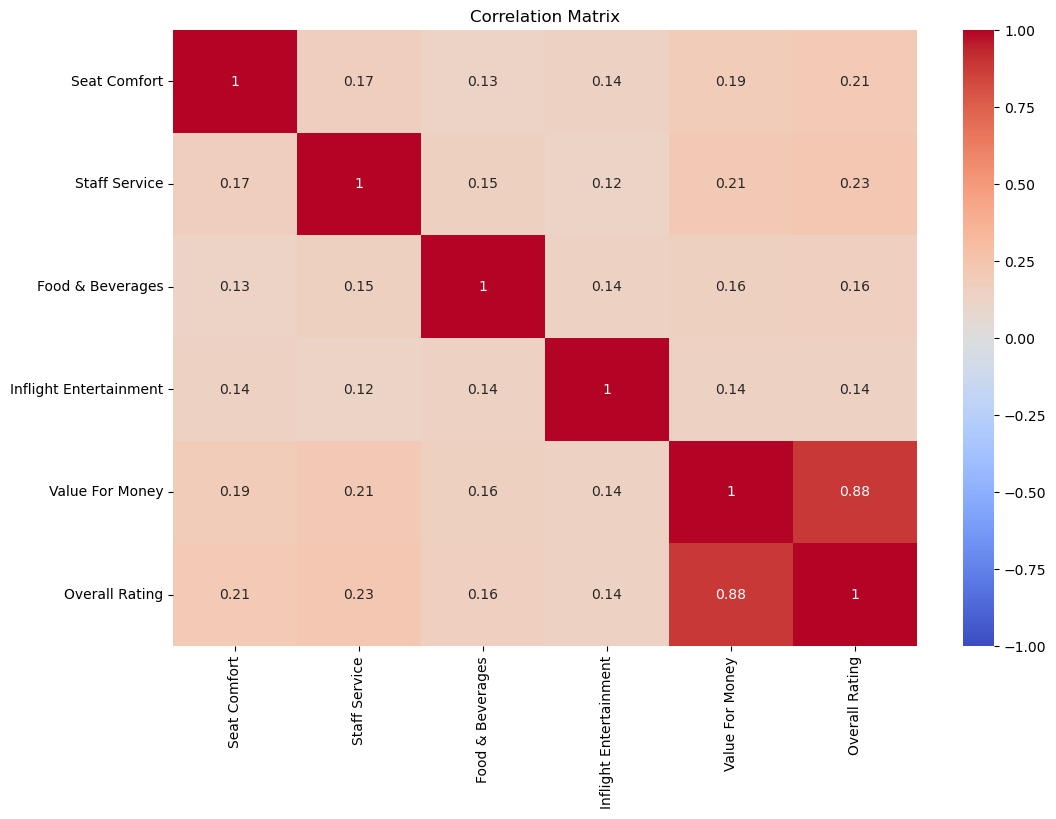

In [28]:
numeric_data = airlines_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


__Average Overall Rating by Airline__

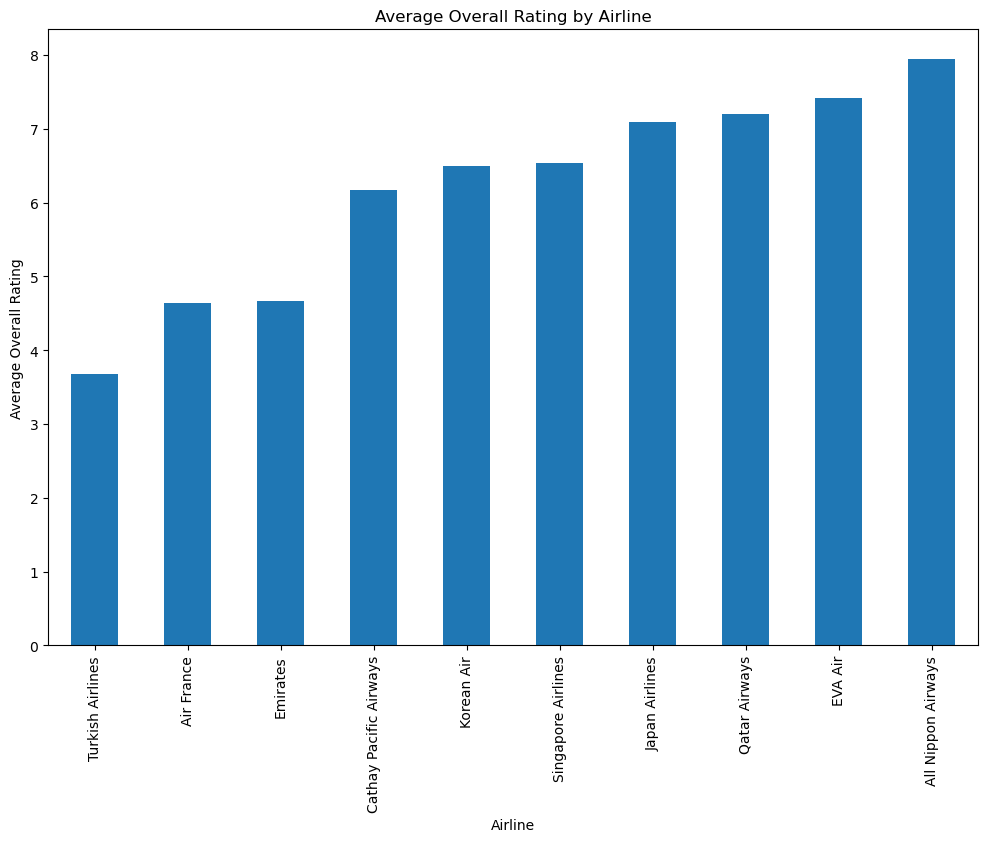

In [31]:
average_ratings_by_airline = airlines_data.groupby('Airline')['Overall Rating'].mean().sort_values()
plt.figure(figsize=(12, 8))
average_ratings_by_airline.plot(kind='bar')
plt.title('Average Overall Rating by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Overall Rating')
plt.show()

__Overall Rating by Class__

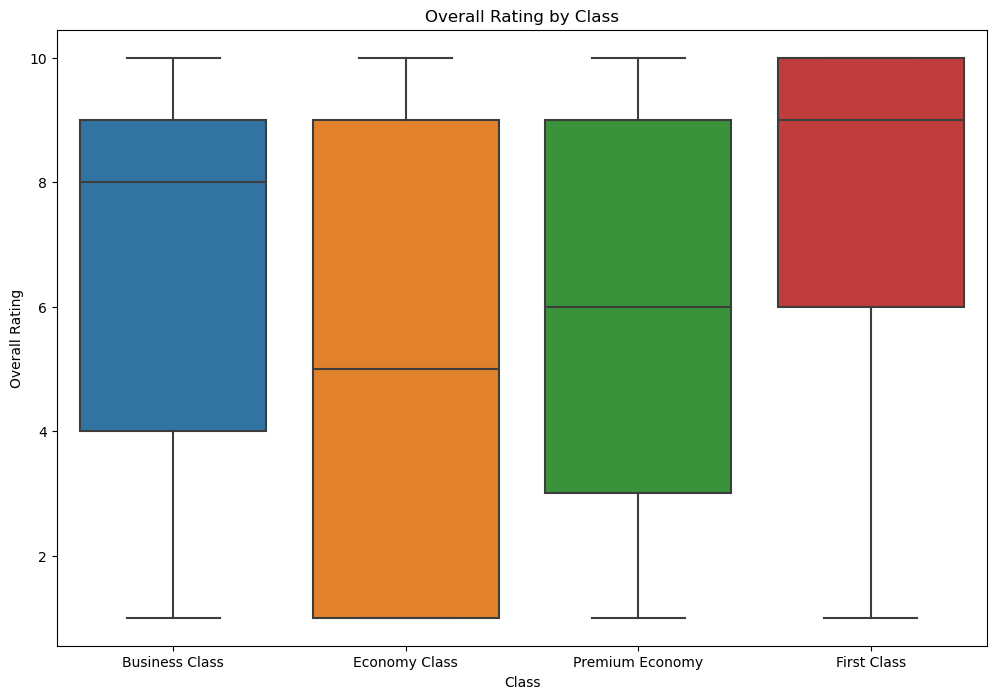

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Class', y='Overall Rating', data=airlines_data)
plt.title('Overall Rating by Class')
plt.xlabel('Class')
plt.ylabel('Overall Rating')
plt.show()

__Performing Sentiment Analysis__

In [38]:
!pip install TextBlob

In [39]:
from textblob import TextBlob

In [40]:
airlines_data.head(6)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes
5,“seat is absolutely dreadful”,Robert Watson,2024-02-19,Singapore Airlines,True,This flight was over six hours long on a B737...,Solo Leisure,February 2024,Singapore to Cairns,Economy Class,5,1,5,5,1,3,no


__Checking for the sentiment of the text__

In [42]:
TextBlob("Flight was amazing").sentiment

Sentiment(polarity=0.6000000000000001, subjectivity=0.9)

In [43]:
airlines_data.shape

(8100, 17)

In [44]:
polarity = []

for comment in airlines_data['Reviews']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [45]:
len(polarity)

8100

In [46]:
airlines_data['polarity']  = polarity

In [47]:
airlines_data.head(5)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,polarity
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,0.384667
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,-0.212500
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,0.500000
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,0.325496
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,0.412500


In [48]:
filter1 = airlines_data['polarity']==1

In [59]:
comments_positive = airlines_data[filter1]

In [61]:
filter2 = airlines_data['polarity']==-1

In [63]:
comments_negative = airlines_data[filter2]

In [65]:
comments_positive.head(5)

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,polarity
1199,Excellent seats and service,Billy Baker,2023-02-08,Qatar Airways,True,Excellent seats and service although the A38...,Solo Leisure,February 2023,Bangkok to Doha,Business Class,5,5,3,4,5,10,yes,1.0
1444,best quality service from them,Athul Kiliyara Murikkincheri,2022-02-27,Qatar Airways,True,Qatar Airways is the best in the world and I...,Solo Leisure,February 2022,Kozikhode to Paris via Doha,Economy Class,4,3,5,5,5,10,yes,1.0
2609,the best customer service,Eliezer Moreno,2023-10-25,All Nippon Airways,True,10/10 the best customer service I’ve ever ex...,Family Leisure,October 2023,Los Angeles to Tokyo Haneda,Economy Class,5,5,4,2,5,10,yes,1.0
2713,the wonderful service,A Kakhadilkar,2019-04-07,All Nippon Airways,True,Tokyo Haneda to Bangkok. I wish to put on re...,Family Leisure,March 2019,Tokyo Haneda to Bangkok,Economy Class,5,5,5,4,5,9,yes,1.0
3555,The service was excellent,Timal Jayamanne,2018-10-26,Emirates,True,Colombo to Dubai. The service was excellent ...,Business,October 2018,Birmingham to Kathmandu via Dubai,Economy Class,2,5,3,4,5,10,yes,1.0


__Performing Wordcloud Analysis__

In [68]:
!pip install wordcloud

In [69]:
from wordcloud import WordCloud , STOPWORDS

In [70]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [71]:
airlines_data['Reviews']

0         Flight was amazing. The crew onboard this fl...
1         Booking an emergency exit seat still meant h...
2         Excellent performance on all fronts. I would...
3        Pretty comfortable flight considering I was f...
4        The service was consistently good from start ...
                              ...                        
8095      KE124, Brisbane to Incheon (A330) and KE867,...
8096      Our recent flight was our fourth trip to the...
8097      I flew Korean Air from Bali to Seoul in Pres...
8098      Seoul to Paris with Korean Air. I am traveli...
8099      The 13 hour flight in Business class from Se...
Name: Reviews, Length: 8100, dtype: object

In [72]:
type(airlines_data['Reviews'])

pandas.core.series.Series

In [73]:
total_comments_positive = ' '.join(comments_positive['Reviews'])

In [74]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

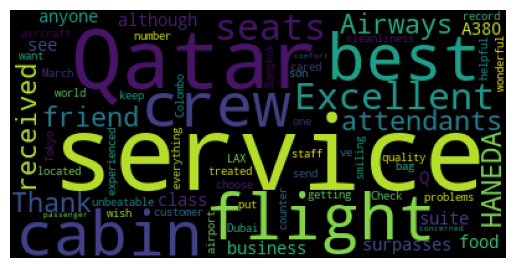

In [75]:
plt.imshow(wordcloud)
plt.axis('off')

In [76]:
total_comments_negative = ' '.join(comments_negative['Reviews'])

In [77]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

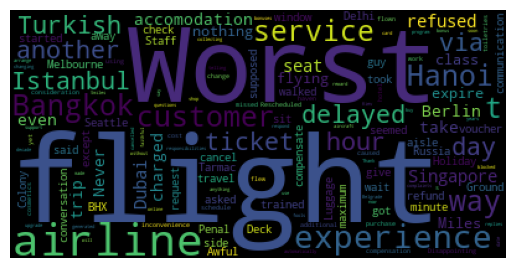

In [78]:
plt.imshow(wordcloud2)
plt.axis('off')